In [20]:
import pandas as pd

In [21]:
path = '../disaster_npl_prediction/'

In [22]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [23]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [24]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [25]:
train = train[['text', 'target']]
test = test[['text']]

In [26]:
train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [6]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
train.shape

(7613, 5)

In [8]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

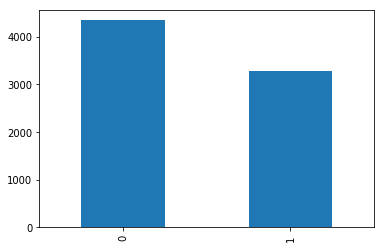

In [9]:
train['target'].value_counts().plot(kind='bar')

In [31]:
train_df_bert = pd.DataFrame({
    'id':range(len(train)),
    'label':train['target'],
    'alpha':['a']*train.shape[0],
    'text': train['text'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,alpha,text
0,0,1,a,Our Deeds are the Reason of this #earthquake M...
1,1,1,a,Forest fire near La Ronge Sask. Canada
2,2,1,a,All residents asked to 'shelter in place' are ...
3,3,1,a,"13,000 people receive #wildfires evacuation or..."
4,4,1,a,Just got sent this photo from Ruby #Alaska as ...


In [33]:
train_df_bert.shape

(7613, 4)

In [34]:
train_df_bert.to_csv(path + 'train.tsv', sep='\t', index=False, header=False)